# Apply simple CV algorithms to geo pictures

1. create threshold map of max brightenss
- erode
- split objects
- dilate
- make submission

In [4]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 0. Imread

In [ ]:
'dataset/TESTING_0/2YNGEOYOEH0YXBJV/2YNGEOYOEH0YXBJV.png'

In [2]:
! ls dataset/TESTING\ O/

2YNGEOYOEH0YXBJV


In [5]:
test_pic = cv2.imread('dataset/TESTING_0/2YNGEOYOEH0YXBJV/2YNGEOYOEH0YXBJV.png')

In [6]:
test_pic.shape

(7737, 6529, 3)

## 1. Create threshold map

In [17]:
ret1,th1 = cv2.threshold(test_pic,250,255,cv2.THRESH_BINARY)
# test_pic

In [11]:
th1.shape

(7737, 6529, 3)

Text(0.5,1,'mask')

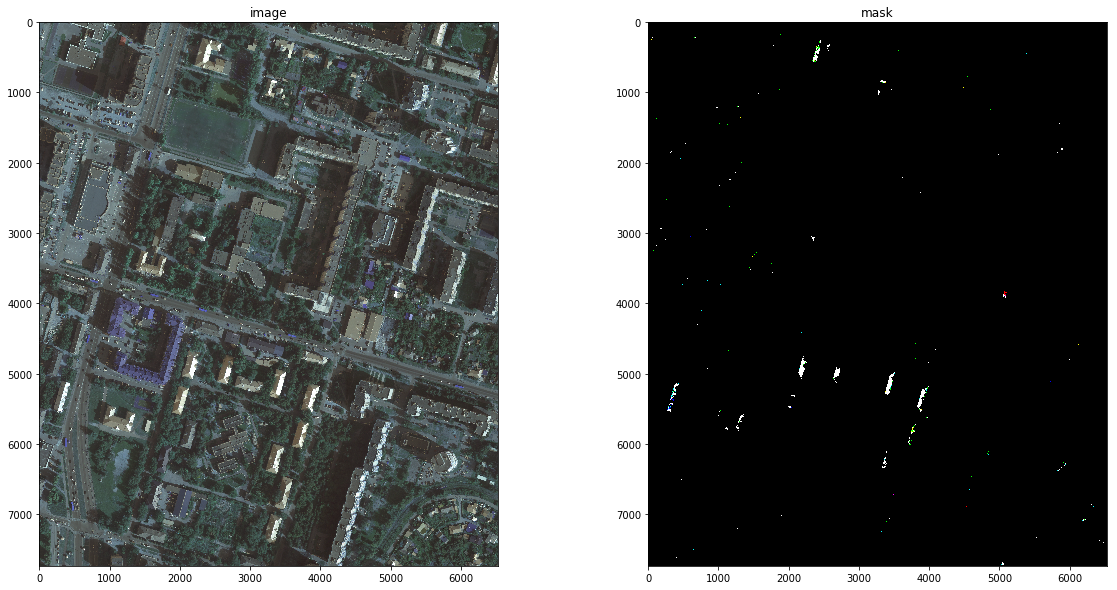

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(test_pic, cmap='gray')
ax1.set_title('image')
ax2.imshow(th1, cmap='gray_r')
ax2.set_title('mask')

In [21]:
mask = cv2.cvtColor(th1, cv2.COLOR_BGR2GRAY)

Text(0.5,1,'mask')

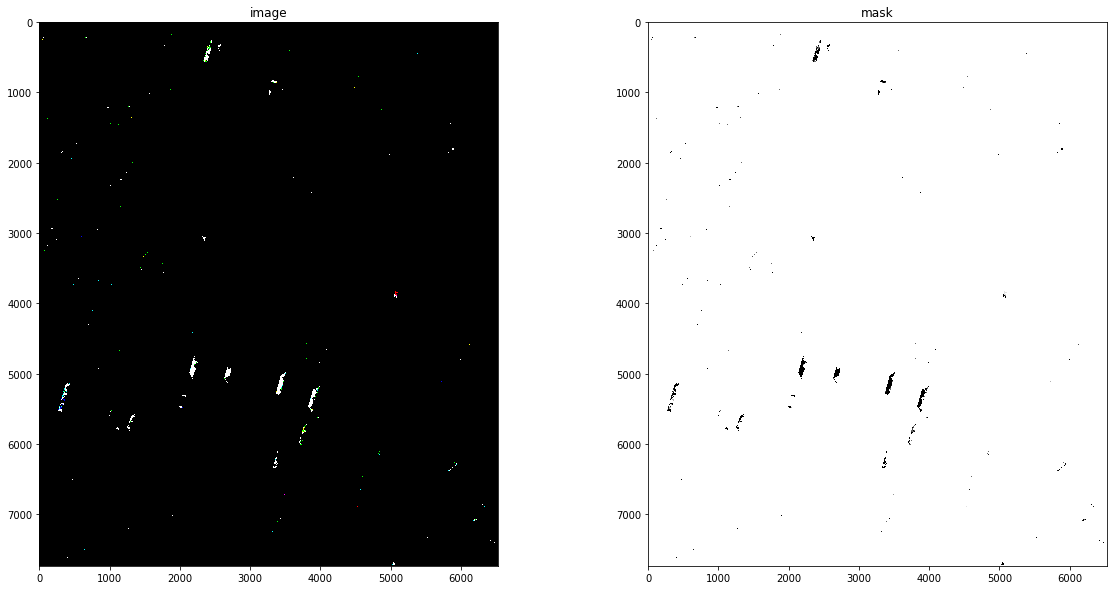

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(th1, cmap='gray')
ax1.set_title('image')
ax2.imshow(mask, cmap='gray_r')
ax2.set_title('mask')

In [29]:
np.unique(mask)

array([  0,  29,  76, 105, 150, 179, 226, 255], dtype=uint8)

In [34]:
vfunc = np.vectorize(lambda x: 0 if x < 255 else 1)

<function matplotlib.pyplot.show(*args, **kw)>

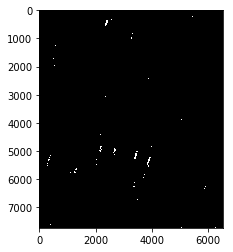

In [35]:
plt.imshow(vfunc(mask), cmap='gray')
plt.show

In [36]:
mask = vfunc(mask)

## 2. Erode

In [63]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(mask.astype(np.float32),kernel,iterations = 1)

In [79]:
opening = cv2.morphologyEx(mask.astype(np.float32), cv2.MORPH_OPEN, kernel, iterations = 1)

In [78]:
dilation = cv2.dilate(mask.astype(np.float32),kernel,iterations = 1)

In [85]:
dilation = cv2.dilate(mask.astype(np.float32),kernel,iterations = 1)
toy_pic = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel, iterations = 5)
dilation = cv2.dilate(mask.astype(np.float32),kernel,iterations = 10)

Text(0.5,1,'mask')

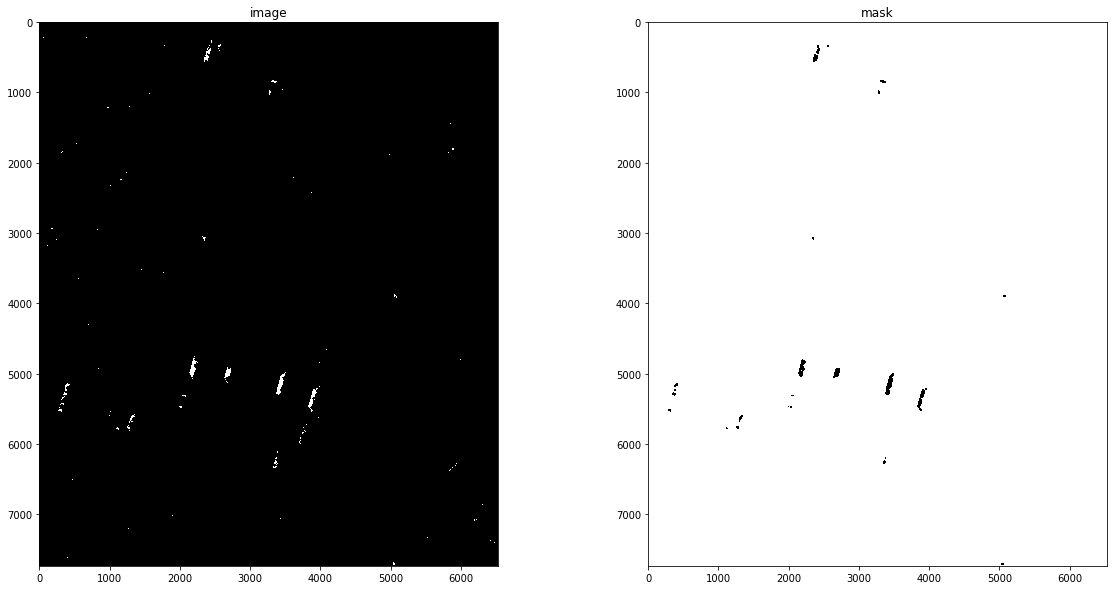

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(mask, cmap='gray')
ax1.set_title('image')
ax2.imshow(toy_pic, cmap='gray_r')
ax2.set_title('mask')

## 3. Connected components

In [90]:
type(toy_pic[0][0])

numpy.float32

In [91]:
ret, markers = cv2.connectedComponents(toy_pic.astype(np.int8))

In [ ]:
markers

In [92]:
markers.shape

(7737, 6529)

Text(0.5,1,'mask')

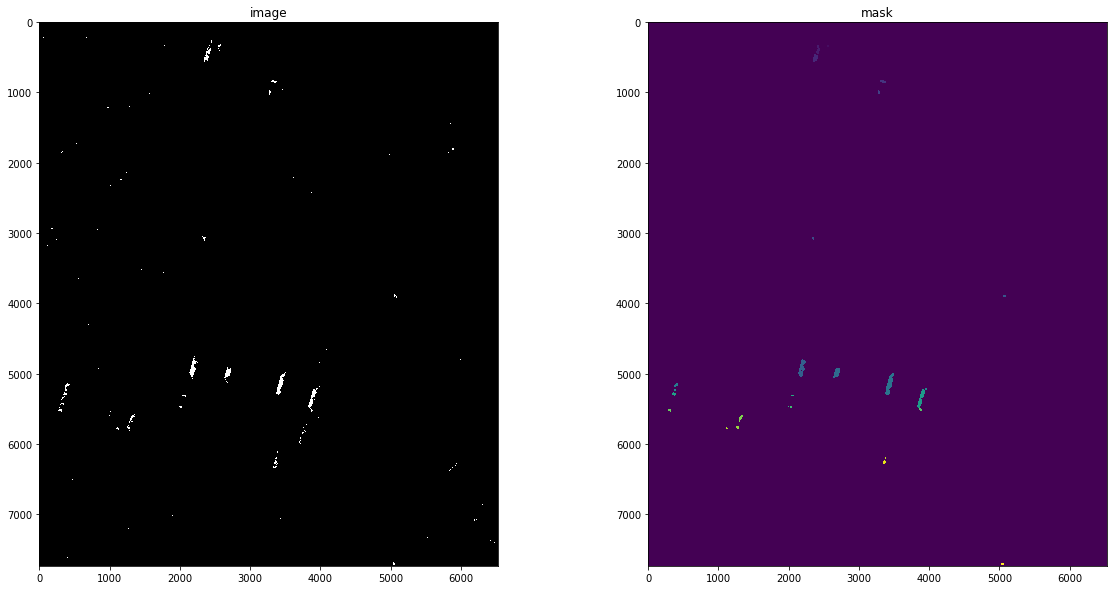

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(mask, cmap='gray')
ax1.set_title('image')
ax2.imshow(markers)
ax2.set_title('mask')

## 4. Watershed

In [96]:
type(mask[0][0]), type(markers[0][0])

(numpy.int64, numpy.int32)

In [100]:
mask.shape

(7737, 6529)

In [103]:
water_markers = cv2.watershed(mask.reshape((7737, 6529, 1)), markers.reshape((7737, 6529, 1)))

error: OpenCV(3.4.1) /root/opencv/modules/imgproc/src/segmentation.cpp:161: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((3)-1) << 3)) && dst.type() == (((4) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function watershed


In [ ]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

In [125]:
np.unique(markers)[1:]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int32)

In [106]:
markers[markers == 0].shape

(50421612,)

## 5. make submission

In [128]:
def rle_encode(img, min_max_threshold=1e-3, max_mean_threshold=None):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    if np.max(img) < min_max_threshold:
        return '' ## no need to encode if it's all zeros
    if max_mean_threshold and np.mean(img) > max_mean_threshold:
        return '' ## ignore overfilled mask
    pixels = img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [ ]:
vselect = np.vectorize(lambda x: 0 if x < 255 else 1)

In [127]:
plt.imshow(np.where(markers == 9, 255, 0))
plt.show()

In [134]:
submission = pd.DataFrame(columns=['ImageId', 'EncodedPixels'])

In [135]:
submission.head()

Empty DataFrame
Columns: [ImageId, EncodedPixels]
Index: []

In [137]:
IMAGE_ID = '2YNGEOYOEH0YXBJV'

In [136]:
rle_encode(np.where(markers == 1, 255, 0))

'19690997 21 19698733 22 19706470 22 19714206 23 19721943 23 19729679 24 19737415 25 19745152 25 19752888 26 19760625 26 19768361 27 19776097 28 19783834 28 19791570 29 19799307 29 19807044 29 19814781 29 19822518 29 19830255 29 19837992 29 19845729 29 19853466 29 19861203 29 19868940 29 19876677 29 19884414 29 19892151 29 19899888 29 19907625 29 19915362 29 19923099 26 19930836 26 19938573 26 19946310 26'

In [156]:
submission = pd.DataFrame(columns=['ImageId', 'EncodedPixels'])
for i in np.unique(markers)[1:]:
    submission.loc[i] = [IMAGE_ID, rle_encode(np.where(markers == i, 255, 0))]
submission

ImageId                                      EncodedPixels
1   2YNGEOYOEH0YXBJV  19690997 21 19698733 22 19706470 22 19714206 2...
2   2YNGEOYOEH0YXBJV  18460890 21 18468627 21 18476364 21 18484101 2...
3   2YNGEOYOEH0YXBJV  18128332 22 18136069 22 18143806 23 18151543 2...
4   2YNGEOYOEH0YXBJV  25579357 22 25587092 24 25594825 28 25602559 3...
5   2YNGEOYOEH0YXBJV  25270026 23 25277762 25 25285498 26 25293226 3...
6   2YNGEOYOEH0YXBJV  18068957 22 18076694 24 18084431 25 18092168 2...
7   2YNGEOYOEH0YXBJV  39075736 26 39083470 29 39091204 33 39098939 3...
8   2YNGEOYOEH0YXBJV  16546683 23 16554417 28 16562152 32 16569886 3...
9   2YNGEOYOEH0YXBJV  20415245 22 20422980 24 20430716 25 20438441 3...
10  2YNGEOYOEH0YXBJV  26094422 22 26102159 23 26109896 25 26117633 2...
11  2YNGEOYOEH0YXBJV  2875594 22 2883331 22 2891068 22 2898805 22 29...
12  2YNGEOYOEH0YXBJV  30496726 23 30504462 27 30512199 29 30519935 3...
13  2YNGEOYOEH0YXBJV  2821485 21 2829222 22 2836959 23 2844696 35 28...
14  2YNGEOYOEH0YXBJV  29645898 25 29653632 30 29661366 35 29669101 3...
15  2YNGEOYOEH0YXBJV  2659080 22 2666816 23 2674549 27 2682285 28 26...
16  2YNGEOYOEH0YXBJV  15781043 21 15788780 21 15796517 21 15804254 2...
17  2YNGEOYOEH0YXBJV  15402089 21 15409826 22 15417563 22 15425300 2...
18  2YNGEOYOEH0YXBJV  15641946 21 15649683 21 15657420 21 15665157 2...
19  2YNGEOYOEH0YXBJV  29878054 22 29885791 25 29893528 26 29901265 2...
20  2YNGEOYOEH0YXBJV  2210552 27 2218289 27 2226026 27 2233762 28 22...
21  2YNGEOYOEH0YXBJV  9970918 21 9978654 22 9986390 23 9994124 26 10...
22  2YNGEOYOEH0YXBJV  9700210 21 9707947 22 9715684 23 9723421 24 97...
23  2YNGEOYOEH0YXBJV  8539680 23 8547413 27 8555149 29 8562885 30 85...
24  2YNGEOYOEH0YXBJV  26041195 22 26048932 22 26056669 22 26064406 2...
25  2YNGEOYOEH0YXBJV  25894258 35 25901992 38 25909724 43 25917458 4...
26  2YNGEOYOEH0YXBJV  38909335 21 38917071 22 38924807 23 38932542 2...

In [160]:
submission.to_csv('submit.csv', index=False)

In [161]:
toy_submit = pd.read_csv('submit.csv')

In [162]:
toy_submit.head()

ImageId                                      EncodedPixels
0  2YNGEOYOEH0YXBJV  19690997 21 19698733 22 19706470 22 19714206 2...
1  2YNGEOYOEH0YXBJV  18460890 21 18468627 21 18476364 21 18484101 2...
2  2YNGEOYOEH0YXBJV  18128332 22 18136069 22 18143806 23 18151543 2...
3  2YNGEOYOEH0YXBJV  25579357 22 25587092 24 25594825 28 25602559 3...
4  2YNGEOYOEH0YXBJV  25270026 23 25277762 25 25285498 26 25293226 3...